<a href="https://colab.research.google.com/github/gna-rus/EXP_analysis/blob/main/EXP_v3_ipynb_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)

In [ ]:
# Загружаю файлы
df_RC = pd.read_csv('/content/drive/MyDrive/for_EXP/IGZO RC Database Ref4-5.csv', encoding = 'windows-1251')
df_RC_SiN200N = pd.read_csv('/content/drive/MyDrive/for_EXP/IGZO RC Database Data Ref4 + SiNx 200nm Nominal.csv', encoding = 'windows-1251')

df_TFT = pd.read_csv('/content/drive/MyDrive/for_EXP/IGZO TFT Database Data Ref4-5.csv',  encoding = 'windows-1251')
df_TFT_SiN200N = pd.read_csv('/content/drive/MyDrive/for_EXP/IGZO TFT Database Data Ref4 + SiNx 200nm Nominal.csv',  encoding = 'windows-1251')

df_TFT = df_TFT.rename(columns = {'п»їDate and time' : 'Date and time'}) # переименовываю столбец
df_TFT_SiN200N = df_TFT_SiN200N.rename(columns = {'п»їDate and time' : 'Date and time'}) # переименовываю столбец.columns


In [ ]:
df_TFT_SiN200N.head()

,Date and time,XPEM,YPEM,Source Table 2,PEM,X,Y,Р РµС†РµРїС‚,Lot-panel,Lot,Panel,Description,TFT,L,Regime,Vfix,Anneal,Von,Hyst,Id(Von+1V),Id(Von+2V),Id(Von+3V),Id(Von+4V),SS,Ioff,Cni,Rtot2,Rtot3,Rtot4,Gate Ox leakage,Cox,IGZO Serpentine,Line gate,Line gate SEMIA,Line SD,Line SEMIA,VIA SD-GATE,VIA SD-SEMIA,vt,von or vt,Cni/Cox,Line Gate-SEMIA,IGZO Serpantine,VIA Gate-SD,VIA SEMIA,Id/meanId,Cox/meanCox,Cox/Cni,SQL,key for uniformity,PEM 24 points,uniformity for Von,Id(Von+2V) filter,uniformity for Id(Von+2V),Id(Von+3V) filter,uniformity for Id(Von+3V),uniformity for Hyst,SQL 2,SQL 3,SQL 4,SQL 5,SQL 6,SQL 7,SQL 8,SQL 9
0,02-02-2024 15_22_18,6,1,EXP69-3 TFT24P bake 02-02-2024 15_22_18,X35-Y1,347224,332816,IGZO_TFT_24P,EXP69-3,EXP69,3,Reference 4 +SiNx 200nm,Nominal,5,Linear,Vd=1V,220C 30 min,"-0,3007065","0,199969","5,623315e-8","3,013455e-7","6,740945e-7","1,105795e-6","0,1817625718",NaN,"31,16","331845,00847","148347,15311","90432,675134",NaN,"36,94",NaN,NaN,NaN,NaN,"1381,4384615",NaN,NaN,NaN,"-0,3007065","0,8435867901","67705593,22",1579130.0,"2,10","876,85","1,112100876","1,228682318","1,1854144846","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t...",EXP69-3 TFT24P bake 02-02-2024 15_22_18220C 30...,1.0,"-3,017820823","3,013455e-7","75,8","6,740945e-7","63,9","44,5","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t...","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t...","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t...","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t...","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t...","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t...","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t...","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t..."
1,02-02-2024 15_22_18,2,1,EXP69-3 TFT24P bake 02-02-2024 15_22_18,X8-Y2,77242,326776,IGZO_TFT_24P,EXP69-3,EXP69,3,Reference 4 +SiNx 200nm,Nominal,5,Linear,Vd=1V,220C 30 min,"0,3002785","0,199943","1,73324e-7","5,84365e-7","1,101675e-6","1,676565e-6","0,1069684612",NaN,"30,55","171125,92301","90770,871627","59645,763809",NaN,"40,67",NaN,NaN,NaN,NaN,"1401,5076923",NaN,NaN,NaN,"0,3002785","0,7511285818","49888813,56",1547670.0,"2,16","861,24","1,8175103529","1,352824587","1,3313299804","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t...",EXP69-3 TFT24P bake 02-02-2024 15_22_18220C 30...,1.0,"-3,017820823","5,84365e-7","75,8","1,101675e-6","63,9","44,5","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t...","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t...","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t...","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t...","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t...","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t...","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t...","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t..."
2,02-02-2024 15_22_18,4,1,EXP69-3 TFT24P bake 02-02-2024 15_22_18,X22-Y2,217232,326776,IGZO_TFT_24P,EXP69-3,EXP69,3,Reference 4 +SiNx 200nm,Nominal,5,Linear,Vd=1V,220C 30 min,-10,0,"-2,8819e-14","-4,02271e-14","-2,89262e-14","-2,6214e-14","0,4897028393",NaN,"1,43","-2,48589e+12","-3,45707e+12","-3,81476e+12",NaN,"34,46",NaN,NaN,NaN,NaN,"102428205,13",NaN,NaN,NaN,NaN,"0,0414849189","60504237,29",8415160.0,"2,10","53148,50","-4,772158e-8","1,1462736126","24,105145343","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"SELECT DISTINCT t1.""Date and time"", t1.XPEM, t...","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t...","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t...","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t...","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t...","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t...","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t...","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t..."
3,02-02-2024 15_22_18,1,2,EXP69-3 TFT24P bake 02-02-2024 15_22_18,X2-Y12,17252,266766,IGZO_TFT_24P,EXP69-3,EXP69,3,Reference 4 +SiNx 200nm,Nominal,5,Linear,Vd=1V,220C 30 min,"0,099813954","0,20116809

In [ ]:
df_TFT_SiN200N[df_TFT_SiN200N['Lot-panel'] == 'EXP74-1']

,Date and time,XPEM,YPEM,Source Table 2,PEM,X,Y,Р РµС†РµРїС‚,Lot-panel,Lot,Panel,Description,TFT,L,Regime,Vfix,Anneal,Von,Hyst,Id(Von+1V),Id(Von+2V),Id(Von+3V),Id(Von+4V),SS,Ioff,Cni,Rtot2,Rtot3,Rtot4,Gate Ox leakage,Cox,IGZO Serpentine,Line gate,Line gate SEMIA,Line SD,Line SEMIA,VIA SD-GATE,VIA SD-SEMIA,vt,von or vt,Cni/Cox,Line Gate-SEMIA,IGZO Serpantine,VIA Gate-SD,VIA SEMIA,Id/meanId,Cox/meanCox,Cox/Cni,SQL,key for uniformity,PEM 24 points,uniformity for Von,Id(Von+2V) filter,uniformity for Id(Von+2V),Id(Von+3V) filter,uniformity for Id(Von+3V),uniformity for Hyst,SQL 2,SQL 3,SQL 4,SQL 5,SQL 6,SQL 7,SQL 8,SQL 9
48,04-03-2024 12_38_03,6,1,EXP74-1 TFT24P Bake_220_30 04-03-2024 12_38_03,X35-Y1,347224,332816,IGZO_TFT_24P,EXP74-1,EXP74,1,Reference 4 +SiNx 200nm,Nominal,5,Linear,Vd=1V,220C 30 min,"0,600246","0,399916","6,196965e-8","2,78945e-7","6,093065e-7","1,002864e-6","0,3206312274","1,66614e-13",NaN,"358493,60985","164121,01299","99714,417907",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0,600246",NaN,NaN,NaN,NaN,NaN,"1,0082770426",NaN,NaN,NaN,EXP74-1 TFT24P Bake_220_30 04-03-2024 12_38_03...,1.0,"0,3992282748","2,78945e-7","68,8","6,093065e-7","68,3","52,3","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t...","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t...","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t...","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t...","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t...","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t...","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t...","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t..."
49,04-03-2024 12_38_03,2,1,EXP74-1 TFT24P Bake_220_30 04-03-2024 12_38_03,X8-Y2,77242,326776,IGZO_TFT_24P,EXP74-1,EXP74,1,Reference 4 +SiNx 200nm,Nominal,5,Linear,Vd=1V,220C 30 min,"0,6001715","0,399933","1,3618255e-7","5,458775e-7","1,109035e-6","1,75628e-6","0,3013670942","1,465887e-13",NaN,"183191,28376","90168,479805","56938,529164",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0,6001715",NaN,NaN,NaN,NaN,NaN,"1,835225014",NaN,NaN,NaN,EXP74-1 TFT24P Bake_220_30 04-03-2024 12_38_03...,1.0,"0,3992282748","5,458775e-7","68,8","1,109035e-6","68,3","52,3","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t...","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t...","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t...","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t...","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t...","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t...","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t...","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t..."
50,04-03-2024 12_38_03,4,1,EXP74-1 TFT24P Bake_220_30 04-03-2024 12_38_03,X22-Y2,217232,326776,IGZO_TFT_24P,EXP74-1,EXP74,1,Reference 4 +SiNx 200nm,Nominal,5,Linear,Vd=1V,220C 30 min,-10,0,"-1,94135e-14","-3,91009e-14","-2,7329e-14","-3,4934e-14","0,7218516345",NaN,NaN,"-2,55749e+12","-3,65912e+12","-2,86254e+12",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"-4,522388e-8",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"SELECT DISTINCT t1.""Date and time"", t1.XPEM, t...","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t...","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t...","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t...","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t...","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t...","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t...","SELECT DISTINCT t1.""Date and time"", t1.XPEM, t..."
51,04-03-2024 12_38_03,1,2,EXP74-1 TFT24P Bake_220_30 04-03-2024 12_38_03,X2-Y12,17252,266766,IGZO_TFT_24P,EXP74-1,EXP74,1,Reference 4 +SiNx 200nm,Nominal,5,Linear,Vd=1V,220C 30 min,"0,400244","0,399792","1,066627e-7","4,479375e-7","9,265695e-7","1,475095e-6","0,306643502","1,574313e-13",NaN,"223245,43045","107924,98566","67792,243889",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0,400244",NaN,NaN,NaN,NaN,NaN,"1,5332821088",NaN,NaN,NaN,EXP74-1 TFT24P Bake_220_30 04-03-2024 12_38_03...,1.0,"0,3992282748","4,479375e-7","68,8","9,26569

# **Модернизация таблицы**

In [ ]:
# Удаляю все лишние колонки
def clean_TFT(df):
  return df.drop(['Date and time','XPEM', 'YPEM', 'Rtot2', 'Rtot3',
       'Rtot4', 'Gate Ox leakage',  'IGZO Serpentine', 'Line gate', 'Lot', 'Source Table 2',
       'Line gate SEMIA', 'Line SD', 'Line SEMIA','L', 'VIA SD-GATE',
       'VIA SD-SEMIA', 'vt', 'von or vt', 'Cni/Cox', 'Line Gate-SEMIA',
       'IGZO Serpantine', 'VIA Gate-SD', 'VIA SEMIA', 'Id/meanId',
       'Cox/meanCox', 'Cox/Cni', 'SQL', 'key for uniformity', 'PEM 24 points',
       'uniformity for Von', 'Id(Von+2V) filter', 'uniformity for Id(Von+2V)',
       'Id(Von+3V) filter', 'uniformity for Id(Von+3V)', 'uniformity for Hyst',
       'SQL 2', 'SQL 3', 'SQL 4', 'SQL 5', 'SQL 6', 'SQL 7', 'Id(Von+1V)', 'Id(Von+2V)',
       'Id(Von+4V)'], axis = 1)

df_TFT_clean = clean_TFT(df_TFT)
df_TFT_SiN200N_clean = clean_TFT(df_TFT_SiN200N)


In [ ]:
# Удаляю все лишние колонки
def clean_RC(df):
    return df.drop(['Index', 'Platform', 'LOT', 'Panel', 'Description', 'Layer',
                          'Measured value', 'Key', 'Measurement settings', '# of VIAs', 'L_Design', 'W_Design',
                          'TFT Performance', 'Measurement date','PEM 24 points'], axis = 1)

df_RC_clean = clean_RC(df_RC)
df_RC_SiN200N_clean = clean_RC(df_RC_SiN200N)


In [ ]:
# создаю колонку в которой будет храниться пометка о том из какого файла таблица
df_TFT_clean['source'] = 'IGZO TFT Database Data Ref4-5'
df_TFT_SiN200N_clean['source'] = 'IGZO TFT Database Data Ref4 + SiNx 200nm Nominal'

df_RC_clean['source'] = 'IGZO RC Database Data Ref4-5'
df_RC_SiN200N_clean['source'] = 'IGZO RC Database Data Ref4 + SiNx 200nm Nominal'

In [ ]:
# изменяю тип переменных на float64 в TFT таблице 'Cni', 'Cox'
def convert_TFT_to_float64(df):
  try:
    df['Id(Von+3V)'] = df['Id(Von+3V)'].str.replace(',', '.').astype('float64')
    df['Von'] = df['Von'].str.replace(',', '.').astype('float64')
    df['Hyst'] = df['Hyst'].str.replace(',', '.').astype('float64')
    df['SS'] = df['SS'].str.replace(',', '.').astype('float64')
    df['Ioff'] = df['Ioff'].str.replace(',', '.').astype('float64')
    df['Cni'] = df['Cni'].str.replace(',', '.').astype('float64')
    df['Cox'] = df['Cox'].str.replace(',', '.').astype('float64')
  except:
    print('error')
  return df

df_TFT_clean = convert_TFT_to_float64(df_TFT_clean)
df_TFT_SiN200N_clean = convert_TFT_to_float64(df_TFT_SiN200N_clean)


In [ ]:
# изменяю тип переменных на float64  в RC таблице
def convert_RC_to_float64(df):
  try:
    df['Capasitance'] = df['Capasitance'].str.replace(',', '.').astype('float64')
    df['Resistance'] = df['Resistance'].str.replace(',', '.').astype('float64')
    df['Sheet resistance'] = df['Sheet resistance'].str.replace(',', '.').astype('float64')
  except:
    print('error')
  return df

df_RC_clean = convert_RC_to_float64(df_RC_clean)
df_RC_SiN200N_clean = convert_RC_to_float64(df_RC_SiN200N_clean)

error


In [ ]:
df_TFT_clean['Ioff'].isnull().sum() # считаю кол-во пропущенных значений в колонке (NaN)

277

Добавляю строчки в таблицу (за счет соединения)

In [ ]:
df_RC_clean = pd.concat([df_RC_clean, df_RC_SiN200N_clean], ignore_index=True)
df_TFT_clean = pd.concat([df_TFT_clean, df_TFT_SiN200N_clean], ignore_index=True)


In [ ]:
# Перемещаю местами колонки чтобы Lot-panel стояла слева скраю, переименовываю и сотрирую
df_RC_clean = df_RC_clean.sort_values('Panel index')
df_RC_clean_sort = df_RC_clean[['Panel index', 'PEM', 'S_Design', 'Bake', 'X_SUSS', 'Y_SUSS',
                                'X_PRB', 'Y_PRB','Measurement Structure',
                                'Capasitance', 'Sheet resistance',
                                'VIA resistance', 'Resistance', 'Leakage current']]
df_RC_clean_sort = df_RC_clean_sort.rename(columns = {'Panel index' : 'Lot-panel'})

# Перемещаю местами колонки чтобы Lot-panel стояла слева скраю и сотрирую
df_TFT_clean = df_TFT_clean.sort_values('Lot-panel')
df_TFT_clean_sort = df_TFT_clean[['Lot-panel', 'PEM','Description','X', 'Y',  'Panel', 'TFT', 'Regime', 'Vfix', 'Anneal', 'Von', 'Hyst', 'Id(Von+3V)', 'SS', 'Ioff', 'Cni', 'Cox']]

# Обьединяю без разделения по Description
df_merge_RC_TFT = df_RC_clean_sort.merge(df_TFT_clean_sort,how='left',on=['Lot-panel','PEM']) # команда обьединения двух таблиц по двум колонкам
df_merge_RC_TFT = df_merge_RC_TFT.drop_duplicates() # удаляю дубликаты

df_TFT_clean_sort_Reference4_SiNx = df_TFT_clean_sort[df_TFT_clean_sort['Description'] == 'Reference 4 +SiNx 200nm']

# Обьединяю с разделения по Description Reference4_SiNx
df_merge_RC_TFT = df_merge_RC_TFT.drop_duplicates() # удаляю дубликаты
df_merge_RC_TFT_Reference4_SiNx = df_RC_clean_sort.merge(df_TFT_clean_sort_Reference4_SiNx,how='left',on=['Lot-panel','PEM']) # команда обьединения двух таблиц по двум колонкам


# Удаляю строки чу которых в Description выставлен не Reference4_SiNx
df_merge_RC_TFT_Reference4_SiNx = df_merge_RC_TFT_Reference4_SiNx[df_merge_RC_TFT_Reference4_SiNx['Description']=='Reference 4 +SiNx 200nm']
# for i in range(0, len(df_merge_RC_TFT_Reference4)):
#   if df_merge_RC_TFT_Reference4.loc[i, 'Description'] != 'Reference 4':
#     df_merge_RC_TFT_Reference4.drop(i, inplace=True)

df_merge_RC_TFT_Reference4_SiNx['X'] = df_merge_RC_TFT_Reference4_SiNx['X'].apply(np.int64)
df_merge_RC_TFT_Reference4_SiNx['Y'] = df_merge_RC_TFT_Reference4_SiNx['Y'].apply(np.int64)
df_merge_RC_TFT_Reference4_SiNx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11765 entries, 1477 to 13540
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Lot-panel              11765 non-null  object 
 1   PEM                    11765 non-null  object 
 2   S_Design               5430 non-null   float64
 3   Bake                   11765 non-null  object 
 4   X_SUSS                 11765 non-null  int64  
 5   Y_SUSS                 11765 non-null  int64  
 6   X_PRB                  11765 non-null  int64  
 7   Y_PRB                  11765 non-null  int64  
 8   Measurement Structure  11765 non-null  object 
 9   Capasitance            5430 non-null   float64
 10  Sheet resistance       3620 non-null   object 
 11  VIA resistance         1810 non-null   float64
 12  Resistance             905 non-null    float64
 13  Leakage current        0 non-null      float64
 14  Description            11765 non-null  object 
 15  X   

In [ ]:
df_merge_RC_TFT_Reference4_SiNx

,Lot-panel,PEM,S_Design,Bake,X_SUSS,Y_SUSS,X_PRB,Y_PRB,Measurement Structure,Capasitance,Sheet resistance,VIA resistance,Resistance,Leakage current,Description,X,Y,Panel,TFT,Regime,Vfix,Anneal,Von,Hyst,Id(Von+3V),SS,Ioff,Cni,Cox
1477,EXP69-3,X35-Y35,NaN,220C 30 min,149616,-42321,344841,126409,IGZO Serpentine,NaN,NaN,NaN,1366440.0,NaN,Reference 4 +SiNx 200nm,344434,127214,3.0,W10L5A,Linear,Vd=1V,220C 30 min,-0.300667,0.199990,3.459845e-07,0.232570,NaN,30.84,29.59
1478,EXP69-3,X35-Y35,NaN,220C 30 min,149616,-42321,344841,126409,IGZO Serpentine,NaN,NaN,NaN,1366440.0,NaN,Reference 4 +SiNx 200nm,347224,128816,3.0,Nominal,Linear,Vd=1V,220C 30 min,-0.200719,0.399802,4.444670e-07,0.145959,NaN,30.84,29.59
1479,EXP69-3,X35-Y35,NaN,220C 30 min,149616,-42321,344841,126409,IGZO Serpentine,NaN,NaN,NaN,1366440.0,NaN,Reference 4 +SiNx 200nm,347224,128816,3.0,Nominal,Linear,Vd=1V,220C 30 min,-0.200719,0.399802,4.444670e-07,0.145959,NaN,30.84,29.59
1480,EXP69-3,X35-Y35,NaN,220C 30 min,151808,-40731,347033,127999,VIA SD-SEMIA,NaN,NaN,1462.0,NaN,NaN,Reference 4 +SiNx 200nm,344434,127214,3.0,W10L5A,Linear,Vd=1V,220C 30 min,-0.300667,0.199990,3.459845e-07,0.232570,NaN,30.84,29.59
1481,EXP69-3,X35-Y35,NaN,220C 30 min,151808,-40731,347033,127999,VIA SD-SEMIA,NaN,NaN,1462.0,NaN,NaN,Reference 4 +SiNx 200nm,347224,128816,3.0,Nominal,Linear,Vd=1V,220C 30 min,-0.200719,0.399802,4.444670e-07,0.145959,NaN,30.84,29.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13536,EXP80-1,X35-Y19,5500.0,220C 30 min,146418,56080,341643,224810,Capacitor GATE-SEMIA,36.4,NaN,NaN,NaN,NaN,Reference 4 +SiNx 200nm,347224,224816,1.0,Nominal,Linear,Vd=1V,220C 30 min,-1.000905,0.000030,7.557355e-07,0.351661,1.408960e-13,NaN,NaN
13537,EXP80-1,X35-Y19,11000.0,220C 30 min,146418,56080,341643,224810,Capacitor GATE-SEMIA,32.6,NaN,NaN,NaN,NaN,Reference 4 +SiNx 200nm,347224,224816,1.0,Nominal,Linear,Vd=1V,220C 30 min,-1.000905,0.000030,7.557355e-07,0.351661,1.408960e-13,NaN,NaN
13538,EXP80-1,X35-Y19,22000.0,220C 30 min,146418,56080,341643,224810,Capacitor GATE-SEMIA,30.7,NaN,NaN,NaN,NaN,Reference 4 +SiNx 200nm,347224,224816,1.0,Nominal,Linear,Vd=1V,220C 30 min,-1.000905,0.000030,7.557355e-07,0.351661,1.408960e-13,NaN,NaN
13539,EXP80-1,X35-Y19,98770.0,220C 30 min,146418,56080,341643,224810,Capacitor GATE-SEMIA,27.3,NaN,NaN,NaN,NaN,Reference 4 +SiNx 200nm,347224,224816,1.0,Nominal,Linear,Vd=1V,220C 30 min,-1.000905,0.000030,7.557355e-07,0.351661,1.408960e-13,NaN,NaN


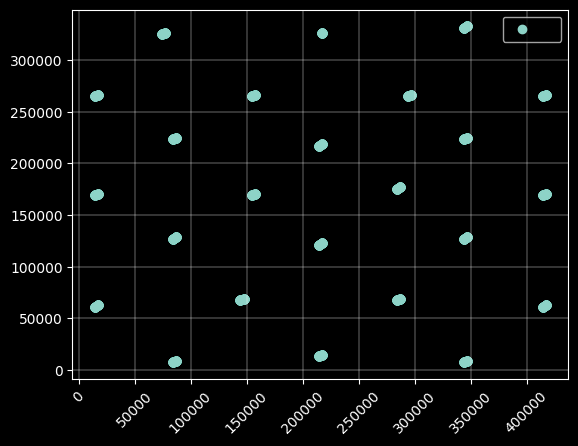

In [ ]:
fig, ax = plt.subplots()
# plt.title("Динамика изменения цены от даты")
# plt.xlabel("Цена")
# plt.ylabel("Дата строительства \ реновации")
plt.scatter(df_merge_RC_TFT_Reference4_SiNx['X'], df_merge_RC_TFT_Reference4_SiNx['Y'], label='  ')
plt.xticks(rotation=45)
plt.grid(linewidth = 0.3)

ax.legend()

In [ ]:
# создаю колонку в которой содержатся координаты точки измерения X Y в виде списка
df_merge_RC_TFT_Reference4_SiNx['XY'] = 1
df_merge_RC_TFT_Reference4_SiNx['XY'] = df_merge_RC_TFT_Reference4_SiNx.apply(lambda row: [row['X'], row['Y']], axis=1)
df_merge_RC_TFT_Reference4_SiNx

,Lot-panel,PEM,S_Design,Bake,X_SUSS,Y_SUSS,X_PRB,Y_PRB,Measurement Structure,Capasitance,Sheet resistance,VIA resistance,Resistance,Leakage current,Description,X,Y,Panel,TFT,Regime,Vfix,Anneal,Von,Hyst,Id(Von+3V),SS,Ioff,Cni,Cox,XY
1477,EXP69-3,X35-Y35,NaN,220C 30 min,149616,-42321,344841,126409,IGZO Serpentine,NaN,NaN,NaN,1366440.0,NaN,Reference 4 +SiNx 200nm,344434,127214,3.0,W10L5A,Linear,Vd=1V,220C 30 min,-0.300667,0.199990,3.459845e-07,0.232570,NaN,30.84,29.59,"[344434, 127214]"
1478,EXP69-3,X35-Y35,NaN,220C 30 min,149616,-42321,344841,126409,IGZO Serpentine,NaN,NaN,NaN,1366440.0,NaN,Reference 4 +SiNx 200nm,347224,128816,3.0,Nominal,Linear,Vd=1V,220C 30 min,-0.200719,0.399802,4.444670e-07,0.145959,NaN,30.84,29.59,"[347224, 128816]"
1479,EXP69-3,X35-Y35,NaN,220C 30 min,149616,-42321,344841,126409,IGZO Serpentine,NaN,NaN,NaN,1366440.0,NaN,Reference 4 +SiNx 200nm,347224,128816,3.0,Nominal,Linear,Vd=1V,220C 30 min,-0.200719,0.399802,4.444670e-07,0.145959,NaN,30.84,29.59,"[347224, 128816]"
1480,EXP69-3,X35-Y35,NaN,220C 30 min,151808,-40731,347033,127999,VIA SD-SEMIA,NaN,NaN,1462.0,NaN,NaN,Reference 4 +SiNx 200nm,344434,127214,3.0,W10L5A,Linear,Vd=1V,220C 30 min,-0.300667,0.199990,3.459845e-07,0.232570,NaN,30.84,29.59,"[344434, 127214]"
1481,EXP69-3,X35-Y35,NaN,220C 30 min,151808,-40731,347033,127999,VIA SD-SEMIA,NaN,NaN,1462.0,NaN,NaN,Reference 4 +SiNx 200nm,347224,128816,3.0,Nominal,Linear,Vd=1V,220C 30 min,-0.200719,0.399802,4.444670e-07,0.145959,NaN,30.84,29.59,"[347224, 128816]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13536,EXP80-1,X35-Y19,5500.0,220C 30 min,146418,56080,341643,224810,Capacitor GATE-SEMIA,36.4,NaN,NaN,NaN,NaN,Reference 4 +SiNx 200nm,347224,224816,1.0,Nominal,Linear,Vd=1V,220C 30 min,-1.000905,0.000030,7.557355e-07,0.351661,1.408960e-13,NaN,NaN,"[347224, 224816]"
13537,EXP80-1,X35-Y19,11000.0,220C 30 min,146418,56080,341643,224810,Capacitor GATE-SEMIA,32.6,NaN,NaN,NaN,NaN,Reference 4 +SiNx 200nm,347224,224816,1.0,Nominal,Linear,Vd=1V,220C 30 min,-1.000905,0.000030,7.557355e-07,0.351661,1.408960e-13,NaN,NaN,"[347224, 224816]"
13538,EXP80-1,X35-Y19,22000.0,220C 30 min,146418,56080,341643,224810,Capacitor GATE-SEMIA,30.7,NaN,NaN,NaN,NaN,Reference 4 +SiNx 200nm,347224,224816,1.0,Nominal,Linear,Vd=1V,220C 30 min,-1.000905,0.000030,7.557355e-07,0.351661,1.408960e-13,NaN,NaN,"[347224, 224816]"
13539,EXP80-1,X35-Y19,98770.0,220C 30 min,146418,56080,341643,224810,Capacitor GATE-SEMIA,27.3,NaN,NaN,NaN,NaN,Reference 4 +SiNx 200nm,347224,224816,1.0,Nominal,Linear,Vd=1V,220C 30 min,-1.000905,0.000030,7.557355e-07,0.351661,1.408960e-13,NaN,NaN,"[347224, 224816]"


In [ ]:
# max_X = 420000
# max_Y = 340000

In [ ]:
# создаю виртуальную модель наименований областей координат
# идея в том чтобы привязать координаты XY к небольшой площади и вариировать в дальнейшем не точными координатами а облостями
# выставляю размеры панели 331 х 411 так как предполагается будет проводится привязка в центру кврадратика со стороной offset_x offset_y
offset_x = 10
offset_y = 10
panel_X = 411
panel_Y = 331
matrix = [[i for i in range(0,panel_X, offset_x)] for j in range(0,panel_Y, offset_y)]
for i in range(len(matrix)):
  for j in range(len(matrix[i])):
    print(f'{j}-{i}|', sep = " ", end = " ")
  print()

0-0| 1-0| 2-0| 3-0| 4-0| 5-0| 6-0| 7-0| 8-0| 9-0| 10-0| 11-0| 12-0| 13-0| 14-0| 15-0| 16-0| 17-0| 18-0| 19-0| 20-0| 21-0| 22-0| 23-0| 24-0| 25-0| 26-0| 27-0| 28-0| 29-0| 30-0| 31-0| 32-0| 33-0| 34-0| 35-0| 36-0| 37-0| 38-0| 39-0| 40-0| 41-0| 
0-1| 1-1| 2-1| 3-1| 4-1| 5-1| 6-1| 7-1| 8-1| 9-1| 10-1| 11-1| 12-1| 13-1| 14-1| 15-1| 16-1| 17-1| 18-1| 19-1| 20-1| 21-1| 22-1| 23-1| 24-1| 25-1| 26-1| 27-1| 28-1| 29-1| 30-1| 31-1| 32-1| 33-1| 34-1| 35-1| 36-1| 37-1| 38-1| 39-1| 40-1| 41-1| 
0-2| 1-2| 2-2| 3-2| 4-2| 5-2| 6-2| 7-2| 8-2| 9-2| 10-2| 11-2| 12-2| 13-2| 14-2| 15-2| 16-2| 17-2| 18-2| 19-2| 20-2| 21-2| 22-2| 23-2| 24-2| 25-2| 26-2| 27-2| 28-2| 29-2| 30-2| 31-2| 32-2| 33-2| 34-2| 35-2| 36-2| 37-2| 38-2| 39-2| 40-2| 41-2| 
0-3| 1-3| 2-3| 3-3| 4-3| 5-3| 6-3| 7-3| 8-3| 9-3| 10-3| 11-3| 12-3| 13-3| 14-3| 15-3| 16-3| 17-3| 18-3| 19-3| 20-3| 21-3| 22-3| 23-3| 24-3| 25-3| 26-3| 27-3| 28-3| 29-3| 30-3| 31-3| 32-3| 33-3| 34-3| 35-3| 36-3| 37-3| 38-3| 39-3| 40-3| 41-3| 
0-4| 1-4| 2-4| 3-4| 4-4| 5-4

In [ ]:
# создаю словарь <наименование области>:<реальные координаты области в мм>
dict_sq = {}
offset_x_zero = 10000 # начальные координаты для первого миниобласти на панели
offset_y_zero = 10000
panel_X_1000 = panel_X * 1000
count_X = offset_x_zero # координаты центров квадратов на панели
count_Y = offset_y_zero
for i in range(len(matrix)):
  for j in range(len(matrix[i])):
    dict_sq[(count_X, count_Y)] = f'{j}-{i}'
    if count_X < panel_X_1000:
      count_X += offset_x * 2000
    else:
      count_X = offset_x_zero
      count_Y += offset_y * 2000


In [ ]:
df_merge_RC_TFT_Reference4_SiNx = df_merge_RC_TFT_Reference4_SiNx.reset_index(drop=False)

In [ ]:
# создаю колонку индексов
df_merge_RC_TFT_Reference4_SiNx['my_id'] = 0

caunt = int(0)
for i in range(len(df_merge_RC_TFT_Reference4_SiNx)):
  df_merge_RC_TFT_Reference4_SiNx['my_id'].iloc[i] = caunt
  caunt += 1
df_merge_RC_TFT_Reference4_SiNx.sort_values(by = 'my_id', kind="quicksort");

Выходные данные были обрезаны до нескольких последних строк (5000).
<ipython-input-22-a4a11083ce93>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge_RC_TFT_Reference4_SiNx['my_id'].iloc[i] = caunt
<ipython-input-22-a4a11083ce93>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge_RC_TFT_Reference4_SiNx['my_id'].iloc[i] = caunt
<ipython-input-22-a4a11083ce93>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge_RC_TF

In [ ]:
df_merge_RC_TFT_Reference4_SiNx

,index,Lot-panel,PEM,S_Design,Bake,X_SUSS,Y_SUSS,X_PRB,Y_PRB,Measurement Structure,Capasitance,Sheet resistance,VIA resistance,Resistance,Leakage current,Description,X,Y,Panel,TFT,Regime,Vfix,Anneal,Von,Hyst,Id(Von+3V),SS,Ioff,Cni,Cox,XY,my_id
0,1477,EXP69-3,X35-Y35,NaN,220C 30 min,149616,-42321,344841,126409,IGZO Serpentine,NaN,NaN,NaN,1366440.0,NaN,Reference 4 +SiNx 200nm,344434,127214,3.0,W10L5A,Linear,Vd=1V,220C 30 min,-0.300667,0.199990,3.459845e-07,0.232570,NaN,30.84,29.59,"[344434, 127214]",0
1,1478,EXP69-3,X35-Y35,NaN,220C 30 min,149616,-42321,344841,126409,IGZO Serpentine,NaN,NaN,NaN,1366440.0,NaN,Reference 4 +SiNx 200nm,347224,128816,3.0,Nominal,Linear,Vd=1V,220C 30 min,-0.200719,0.399802,4.444670e-07,0.145959,NaN,30.84,29.59,"[347224, 128816]",1
2,1479,EXP69-3,X35-Y35,NaN,220C 30 min,149616,-42321,344841,126409,IGZO Serpentine,NaN,NaN,NaN,1366440.0,NaN,Reference 4 +SiNx 200nm,347224,128816,3.0,Nominal,Linear,Vd=1V,220C 30 min,-0.200719,0.399802,4.444670e-07,0.145959,NaN,30.84,29.59,"[347224, 128816]",2
3,1480,EXP69-3,X35-Y35,NaN,220C 30 min,151808,-40731,347033,127999,VIA SD-SEMIA,NaN,NaN,1462.0,NaN,NaN,Reference 4 +SiNx 200nm,344434,127214,3.0,W10L5A,Linear,Vd=1V,220C 30 min,-0.300667,0.199990,3.459845e-07,0.232570,NaN,30.84,29.59,"[344434, 127214]",3
4,1481,EXP69-3,X35-Y35,NaN,220C 30 min,151808,-40731,347033,127999,VIA SD-SEMIA,NaN,NaN,1462.0,NaN,NaN,Reference 4 +SiNx 200nm,347224,128816,3.0,Nominal,Linear,Vd=1V,220C 30 min,-0.200719,0.399802,4.444670e-07,0.145959,NaN,30.84,29.59,"[347224, 128816]",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11760,13536,EXP80-1,X35-Y19,5500.0,220C 30 min,146418,56080,341643,224810,Capacitor GATE-SEMIA,36.4,NaN,NaN,NaN,NaN,Reference 4 +SiNx 200nm,347224,224816,1.0,Nominal,Linear,Vd=1V,220C 30 min,-1.000905,0.000030,7.557355e-07,0.351661,1.408960e-13,NaN,NaN,"[347224, 224816]",11760
11761,13537,EXP80-1,X35-Y19,11000.0,220C 30 min,146418,56080,341643,224810,Capacitor GATE-SEMIA,32.6,NaN,NaN,NaN,NaN,Reference 4 +SiNx 200nm,347224,224816,1.0,Nominal,Linear,Vd=1V,220C 30 min,-1.000905,0.000030,7.557355e-07,0.351661,1.408960e-13,NaN,NaN,"[347224, 224816]",11761
11762,13538,EXP80-1,X35-Y19,22000.0,220C 30 min,146418,56080,341643,224810,Capacitor GATE-SEMIA,30.7,NaN,NaN,NaN,NaN,Reference 4 +SiNx 200nm,347224,224816,1.0,Nominal,Linear,Vd=1V,220C 30 min,-1.000905,0.000030,7.557355e-07,0.351661,1.408960e-13,NaN,NaN,"[347224, 224816]",11762
11763,13539,EXP80-1,X35-Y19,98770.0,220C 30 min,146418,56080,341643,224810,Capacitor GATE-SEMIA,27.3,NaN,NaN,NaN,NaN,Reference 4 +SiNx 200nm,347224,224816,1.0,Nominal,Linear,Vd=1V,220C 30 min,-1.000905,0.000030,7.557355e-07,0.351661,1.408960e-13,NaN,NaN,"[347224, 224816]",11763


In [ ]:
###
# Алгоритм присвоения каждому измерению на панели координаты одной из ячейки матрицы созданной ранее
###
dict1 = list(dict_sq.keys())

def connect_fun(df):
  for i in dict1:
    if (abs(i[0] - df['XY'][0])<10000 and (abs(i[1] - df['XY'][1])<10000)):
      df_merge_RC_TFT_Reference4_SiNx['Num_of_square'].iloc[df['my_id']] = i
      break

df_merge_RC_TFT_Reference4_SiNx['Num_of_square'] = ""
df_merge_RC_TFT_Reference4_SiNx.apply(connect_fun, axis=1)


0        None
1        None
2        None
3        None
4        None
         ... 
11760    None
11761    None
11762    None
11763    None
11764    None
Length: 11765, dtype: object

In [ ]:
# Проверка, есть ли Null в Num_of_square
df_merge_RC_TFT_Reference4_SiNx[df_merge_RC_TFT_Reference4_SiNx['Num_of_square']==""]

,index,Lot-panel,PEM,S_Design,Bake,X_SUSS,Y_SUSS,X_PRB,Y_PRB,Measurement Structure,Capasitance,Sheet resistance,VIA resistance,Resistance,Leakage current,Description,X,Y,Panel,TFT,Regime,Vfix,Anneal,Von,Hyst,Id(Von+3V),SS,Ioff,Cni,Cox,XY,my_id,Num_of_square


In [ ]:
df_merge_RC_TFT_Reference4_SiNx['Num_of_square'].value_counts()

Num_of_square
(350000, 130000)    507
(90000, 130000)     507
(350000, 230000)    507
(210000, 210000)    507
(290000, 170000)    507
                   ... 
(410000, 170000)    507
(150000, 70000)     507
(210000, 130000)    507
(90000, 230000)     507
(210000, 330000)    104
Name: count, Length: 24, dtype: int64

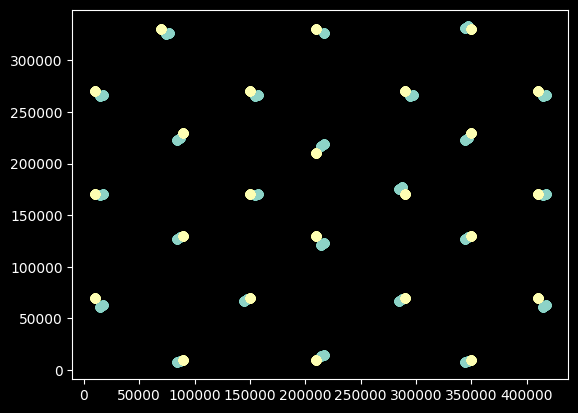

In [ ]:
plt.scatter(df_merge_RC_TFT_Reference4_SiNx['X'], df_merge_RC_TFT_Reference4_SiNx['Y'], label='  ')

list_x = []
list_y = []
for i in df_merge_RC_TFT_Reference4_SiNx['Num_of_square']:
  # list1 = df_merge_RC_TFT_Reference4_SiNx['Num_of_square'].iloc[i]
  try:
    list_x.append(int(i[0]))
    list_y.append(int(i[1]))
  except:
    list_x.append(int(0))
    list_y.append(int(0))


plt.scatter(list_x, list_y)


In [ ]:
df_merge_RC_TFT_Reference4_SiNx['Description'].value_counts()

Description
Reference 4 +SiNx 200nm    11765
Name: count, dtype: int64

In [ ]:
df_merge_RC_TFT_Reference4_SiNx['Lot-panel'].value_counts()

Lot-panel
EXP69-3    1807
EXP72-4    1807
EXP74-1    1807
EXP74-2    1807
EXP74-3    1807
EXP74-4    1807
EXP75-1     312
EXP75-2     312
EXP80-1     299
Name: count, dtype: int64

In [ ]:
# df_merge_RC_TFT_Reference4_SiNx.to_excel ('/content/drive/MyDrive/for_EXP/Merge_RC_TFT.xlsx')

In [ ]:
df_merge_RC_TFT_Reference4_SiNx[df_merge_RC_TFT_Reference4_SiNx['Lot-panel'] == 'EXP69-3']['Von'].value_counts()

Von
-0.100719     52
-0.100768     52
-0.700675     52
-0.100807     52
 0.099814     52
              ..
-0.200807     26
-0.200693     26
-0.300692     26
-0.100775     26
-10.000000    13
Name: count, Length: 47, dtype: int64